In [218]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [11]:
# upload csv Data.  All data from Kaggle.com(https://www.kaggle.com/datasets/truecue/worldsustainabilitydataset?select=WorldSustainabilityDataset.csv)
# https://www.kaggle.com/datasets/bahadirumutiscimen/cancer-death-rates-in-the-world-19902019

cancer_path = "Resources/total-cancer-deaths-by-type.csv"
econ_path = "Resources/WorldSustainabilityDataset.csv"

# Upload Raw Kaggle Data
cancer_df = pd.read_csv(cancer_path)
econ_df = pd.read_csv(econ_path)

In [12]:
cancer_df.head()

,Entity,Code,Year,Deaths - Liver cancer - Sex: Both - Age: All Ages (Number),Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number),Deaths - Lip and oral cavity cancer - Sex: Both - Age: All Ages (Number),"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)",Deaths - Larynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: All Ages (Number),Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number),...,Deaths - Brain and central nervous system cancer - Sex: Both - Age: All Ages (Number),Deaths - Non-Hodgkin lymphoma - Sex: Both - Age: All Ages (Number),Deaths - Pancreatic cancer - Sex: Both - Age: All Ages (Number),Deaths - Esophageal cancer - Sex: Both - Age: All Ages (Number),Deaths - Testicular cancer - Sex: Both - Age: All Ages (Number),Deaths - Nasopharynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Other pharynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Colon and rectum cancer - Sex: Both - Age: All Ages (Number),Deaths - Non-melanoma skin cancer - Sex: Both - Age: All Ages (Number),Deaths - Mesothelioma - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,851,66,89,983,260,180,47,...,422,996,138,529,3,66,37,539,25,6
1,Afghanistan,AFG,1991,866,66,89,982,263,182,48,...,438,1010,137,535,4,67,37,542,26,7
2,Afghanistan,AFG,1992,890,68,91,989,268,185,51,...,472,1040,137,546,4,69,38,550,26,7
3,Afghanistan,AFG,1993,914,70,93,995,275,189,53,...,505,1062,139,560,5,72,39,555,27,7
4,Afghanistan,AFG,1994,933,71,94,996,282,193,54,...,526,1069,140,575,5,73,39,554,28,8


In [13]:
econ_df.head()

,Country Name,Country Code,Year,Access to electricity (% of population) - EG.ELC.ACCS.ZS,Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS,...,Gini index (World Bank estimate) - SI.POV.GINI,Income Classification (World Bank Definition),Individuals using the Internet (% of population) - IT.NET.USER.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Regime Type (RoW Measure Definition),Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,World Regions (UN SDG Definition)
0,Aruba,ABW,2000,91.660398,NaN,15.392211,2.389134,0.000190,0.000190,NaN,...,NaN,High income,NaN,NaN,NaN,NaN,53.283,NaN,NaN,Latin America and Caribbean
1,Aruba,ABW,2001,100.000000,NaN,11.491930,2.509046,0.000214,0.000214,NaN,...,NaN,High income,17.1,73.853,92892.0,NaN,53.661,0.000712,46.339,Latin America and Caribbean
2,Aruba,ABW,2002,100.000000,NaN,3.893620,2.721385,0.000223,0.000223,NaN,...,NaN,High income,18.8,73.937,94992.0,NaN,54.028,0.000657,45.972,Latin America and Caribbean
3,Aruba,ABW,2003,100.000000,NaN,6.713863,2.733676,0.000243,0.000243,NaN,...,NaN,High income,20.8,74.038,97016.0,NaN,54.394,0.000700,45.606,Latin America and Caribbean
4,Aruba,ABW,2004,100.000000,NaN,9.801576,2.678363,0.000256,0.000256,NaN,...,NaN,High income,23.0,74.156,98744.0,NaN,54.760,0.000685,45.240,Latin America and Caribbean


In [14]:
#  Create list of countries from each dataset

cancer_list= cancer_df["Entity"].unique()
econ_list = econ_df["Country Name"].unique()

In [15]:
# Count identical countries in each dataset
country_count = []

for x in cancer_list:
    if x in econ_list:
        country_count.append(x)
        
print(len(country_count))

149


In [16]:
# Print list of matching countries
country_count

['Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Les

In [17]:
# Merge Dataframes on country and year "inner" into new cancer_merge_df

cancer_merge_df = pd.merge(cancer_df, econ_df, how="inner", left_on=["Entity","Year"], right_on=["Country Name","Year"], copy=False)

In [18]:
# Review new data frame
cancer_merge_df.head()

,Entity,Code,Year,Deaths - Liver cancer - Sex: Both - Age: All Ages (Number),Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number),Deaths - Lip and oral cavity cancer - Sex: Both - Age: All Ages (Number),"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)",Deaths - Larynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: All Ages (Number),Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number),...,Gini index (World Bank estimate) - SI.POV.GINI,Income Classification (World Bank Definition),Individuals using the Internet (% of population) - IT.NET.USER.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Regime Type (RoW Measure Definition),Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,World Regions (UN SDG Definition)
0,Albania,ALB,2000,316,40,31,748,70,26,23,...,NaN,Lower-middle income,NaN,NaN,NaN,Electoral Autocracy,58.259,NaN,NaN,Europe and Northern America
1,Albania,ALB,2001,301,42,31,734,68,26,21,...,NaN,Lower-middle income,0.325798,74.288,3060173.0,Electoral Autocracy,57.565,0.755950,42.435,Europe and Northern America
2,Albania,ALB,2002,295,47,34,765,72,28,21,...,31.7,Lower-middle income,0.390081,74.579,3051010.0,Electoral Autocracy,56.499,0.760798,43.501,Europe and Northern America
3,Albania,ALB,2003,290,53,37,806,77,30,21,...,NaN,Lower-middle income,0.971900,74.828,3039616.0,Electoral Autocracy,55.427,0.733194,44.573,Europe and Northern America
4,Albania,ALB,2004,272,57,39,817,77,31,21,...,NaN,Lower-middle income,2.420388,75.039,3026939.0,Electoral Autocracy,54.349,0.770849,45.651,Europe and Northern America


In [19]:
# View column names
cancer_merge_df.columns

Index(['Entity', 'Code', 'Year',
       'Deaths - Liver cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Lip and oral cavity cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Larynx cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number)',
       'Deaths - Leukemia - Sex: Both - Age: All Ages (Number)',
       'Deaths - Hodgkin lymphoma - Sex: Both - Age: All Ages (Number)',
       'Deaths - Multiple myeloma - Sex: Both - Age: All Ages (Number)',
       'Deaths - Other neoplasms - Sex: Both - Age: All Ages (Number)',
       'Deaths - Breast cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Prostate cancer - Sex: Both - Age: All A

In [20]:
# Creat keep list of columns from group for first review

keep = ['Entity','Year',
       'Deaths - Liver cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number)',
       'Deaths - Leukemia - Sex: Both - Age: All Ages (Number)',
       'Deaths - Breast cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Prostate cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Thyroid cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Bladder cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Uterine cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Ovarian cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cervical cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Non-Hodgkin lymphoma - Sex: Both - Age: All Ages (Number)',
       'Deaths - Pancreatic cancer - Sex: Both - Age: All Ages (Number)',
       'Deaths - Colon and rectum cancer - Sex: Both - Age: All Ages (Number)',
       'Access to electricity (% of population) - EG.ELC.ACCS.ZS',
       'Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS',
       'Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS',
       'Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS',
       'Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS',
       'Final consumption expenditure (% of GDP) - NE.CON.TOTL.ZS',
       'GDP (current US$) - NY.GDP.MKTP.CD','Continent',
       'General government final consumption expenditure (% of GDP) - NE.CON.GOVT.ZS',
       'Inflation, consumer prices (annual %) - FP.CPI.TOTL.ZG',
       'Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS',
       'Prevalence of undernourishment (%) - SN_ITK_DEFC - 2.1.1',
       'Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1',
       'Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1',
       'Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes',
       'Income Classification (World Bank Definition)',
       'Life expectancy at birth, total (years) - SP.DYN.LE00.IN',
       'Population, total - SP.POP.TOTL',
       'Regime Type (RoW Measure Definition)',
       'Rural population (% of total population) - SP.RUR.TOTL.ZS',
       'Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS',
       'Urban population (% of total population) - SP.URB.TOTL.IN.ZS',
       'World Regions (UN SDG Definition)']

In [21]:
# Create new df to hold kept columns
cancer_clean_df = cancer_merge_df[keep]

cancer_clean_df.head()

,Entity,Year,Deaths - Liver cancer - Sex: Both - Age: All Ages (Number),Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number),"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)",Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number),Deaths - Leukemia - Sex: Both - Age: All Ages (Number),Deaths - Breast cancer - Sex: Both - Age: All Ages (Number),Deaths - Prostate cancer - Sex: Both - Age: All Ages (Number),Deaths - Thyroid cancer - Sex: Both - Age: All Ages (Number),...,Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1,"Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Income Classification (World Bank Definition),"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Regime Type (RoW Measure Definition),Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,World Regions (UN SDG Definition)
0,Albania,2000,316,40,748,23,125,162,192,14,...,NaN,3.004,Lower-middle income,NaN,NaN,Electoral Autocracy,58.259,NaN,NaN,Europe and Northern America
1,Albania,2001,301,42,734,21,121,163,195,14,...,NaN,3.221,Lower-middle income,74.288,3060173.0,Electoral Autocracy,57.565,0.755950,42.435,Europe and Northern America
2,Albania,2002,295,47,765,21,124,175,206,14,...,NaN,3.748,Lower-middle income,74.579,3051010.0,Electoral Autocracy,56.499,0.760798,43.501,Europe and Northern America
3,Albania,2003,290,53,806,21,129,191,219,15,...,NaN,4.232,Lower-middle income,74.828,3039616.0,Electoral Autocracy,55.427,0.733194,44.573,Europe and Northern America
4,Albania,2004,272,57,817,21,132,198,227,15,...,NaN,4.104,Lower-middle income,75.039,3026939.0,Electoral Autocracy,54.349,0.770849,45.651,Europe and Northern America


In [22]:
# CReate list of for new df columns

kept_list = cancer_clean_df.columns


In [23]:
# Check null values and print column and % of null values remaining in dataset

for name in kept_list:
    null = cancer_clean_df[name].isnull().sum(axis=0)
    perc_null = (null/2831)*100
    print(f'{name} has {perc_null} nulls')

Entity has 0.0 nulls
Year has 0.0 nulls
Deaths - Liver cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Leukemia - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Breast cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Prostate cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Thyroid cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Bladder cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Uterine cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Ovarian cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Cervical cancer - Sex: Both - Age: All Ages (Number) has 0.0 nulls
Deaths - Non-Hodgkin lymphoma - Sex: B

In [24]:
# Make a new dataframe comparing countries to high null % columns

check_nulls = cancer_clean_df[['Entity','Prevalence of undernourishment (%) - SN_ITK_DEFC - 2.1.1',
       'Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1']]

check_nulls.head()

,Entity,Prevalence of undernourishment (%) - SN_ITK_DEFC - 2.1.1,Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1
0,Albania,NaN,NaN
1,Albania,4.9,NaN
2,Albania,6.1,NaN
3,Albania,7.5,NaN
4,Albania,8.6,NaN


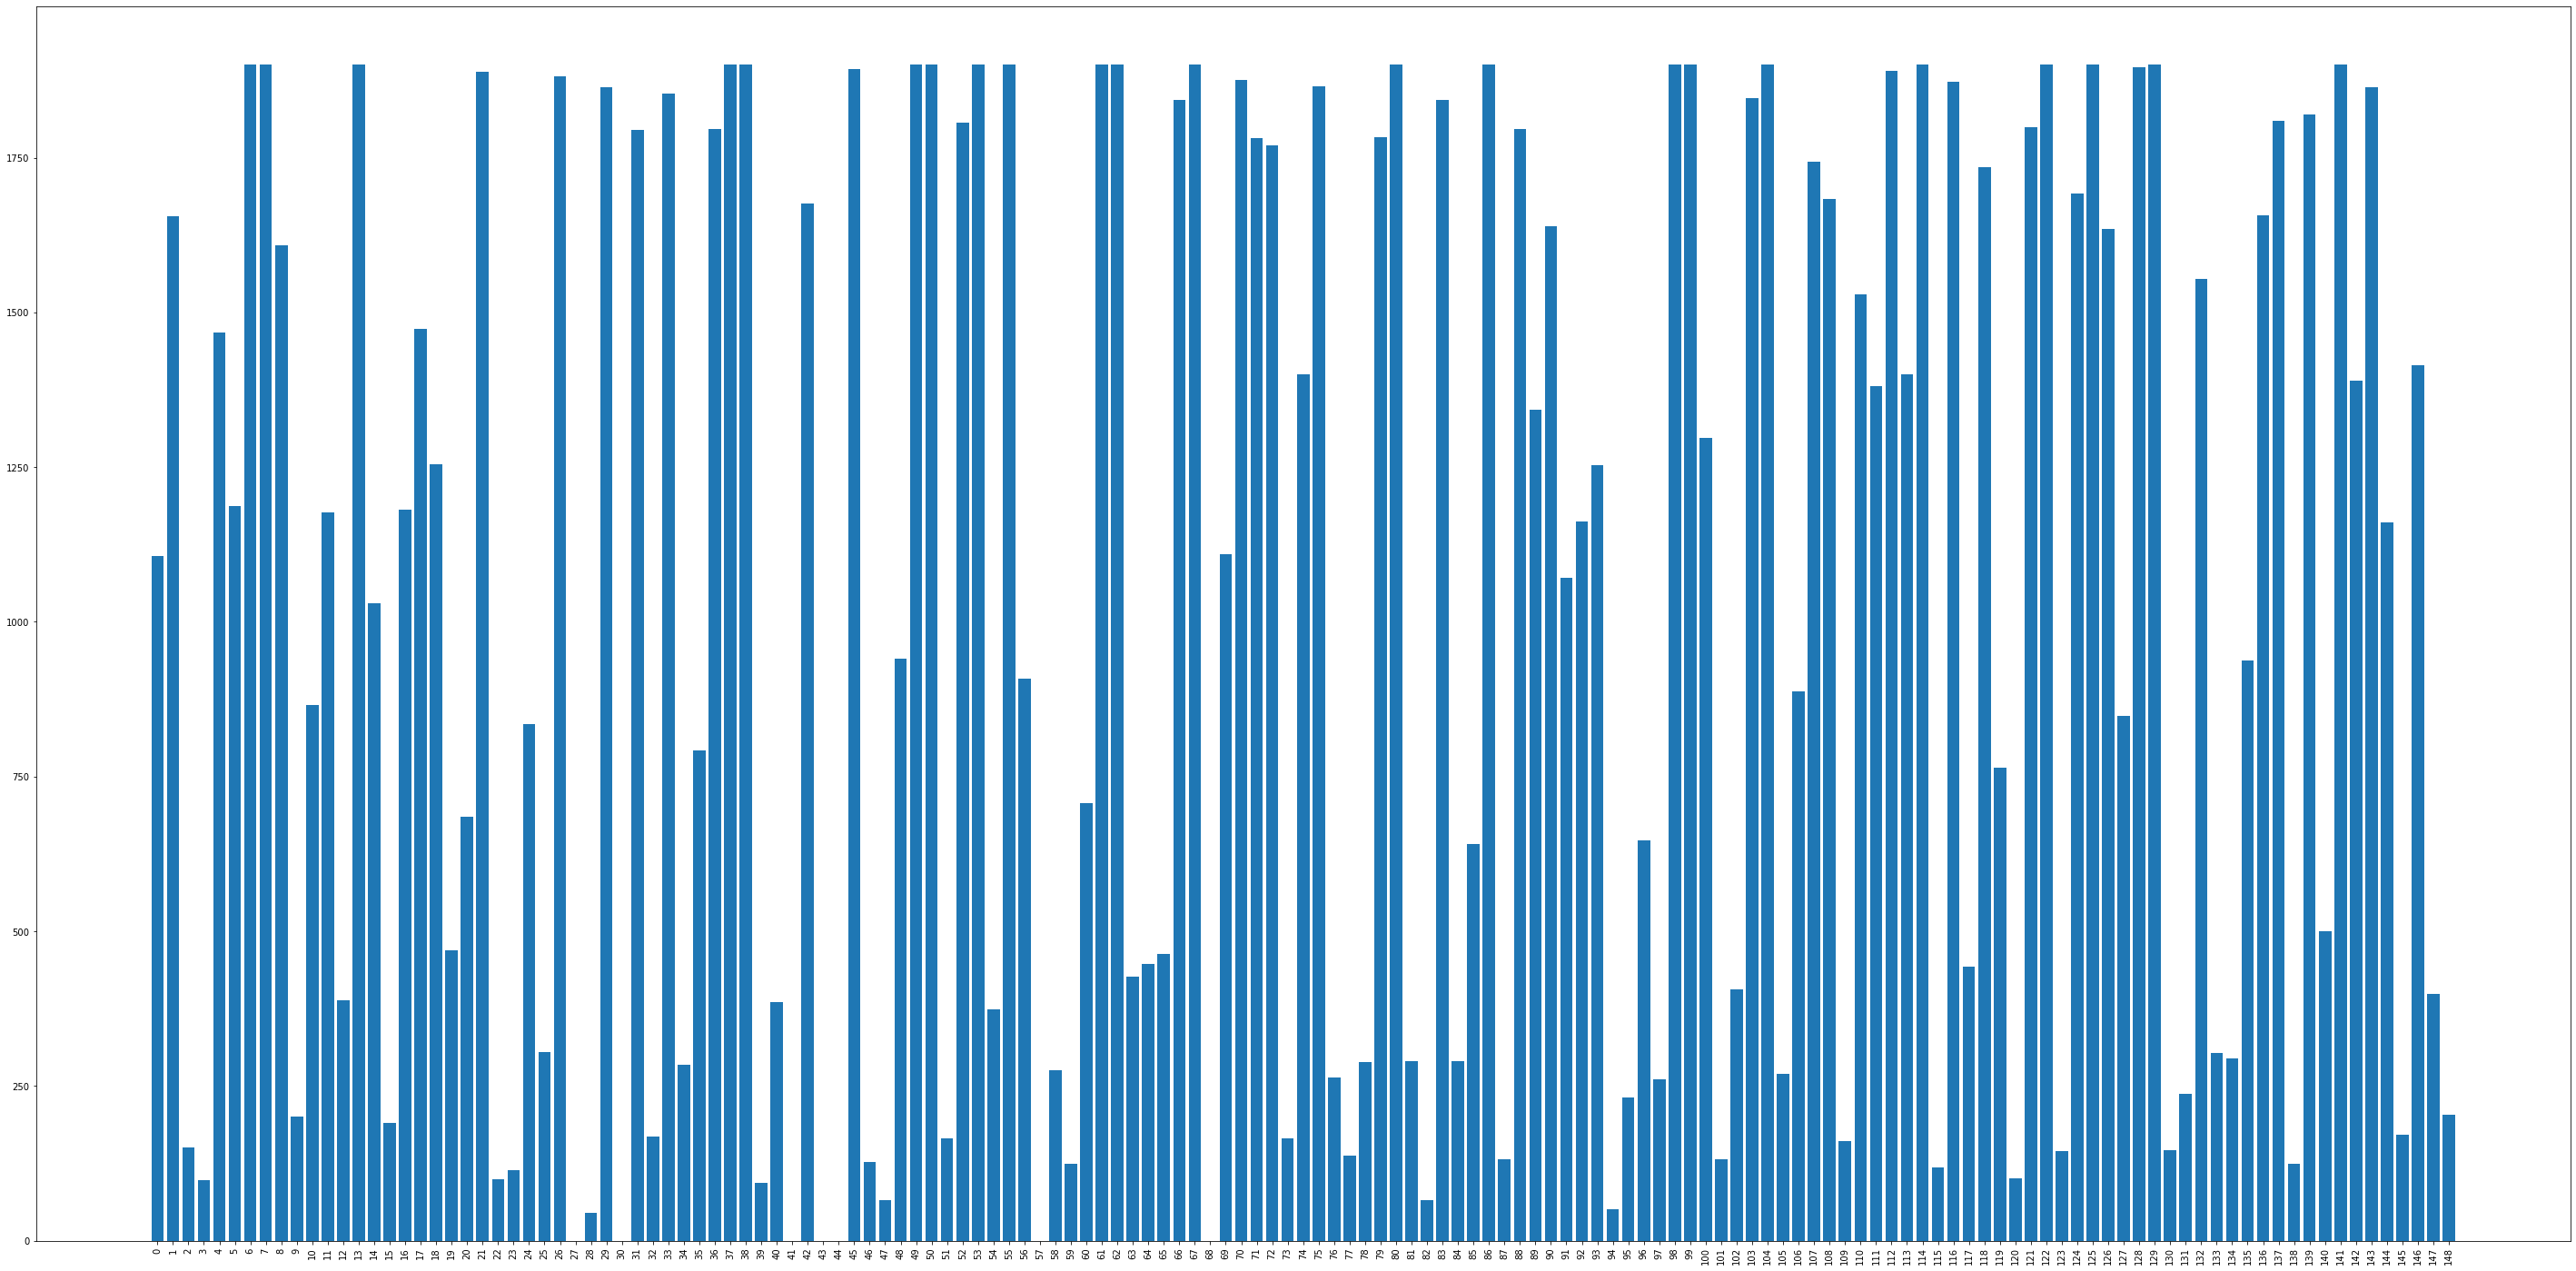

In [25]:
# Check water column for null data totals 41% of data is Null

country = check_nulls.groupby(check_nulls['Entity']).sum()
country.reset_index(inplace=True)
x = country['Entity'].tolist()
y = country['Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1']

plt.figure(figsize=(50, 25))
plt.bar(x, y)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticks(), rotation = 90)

plt.show()

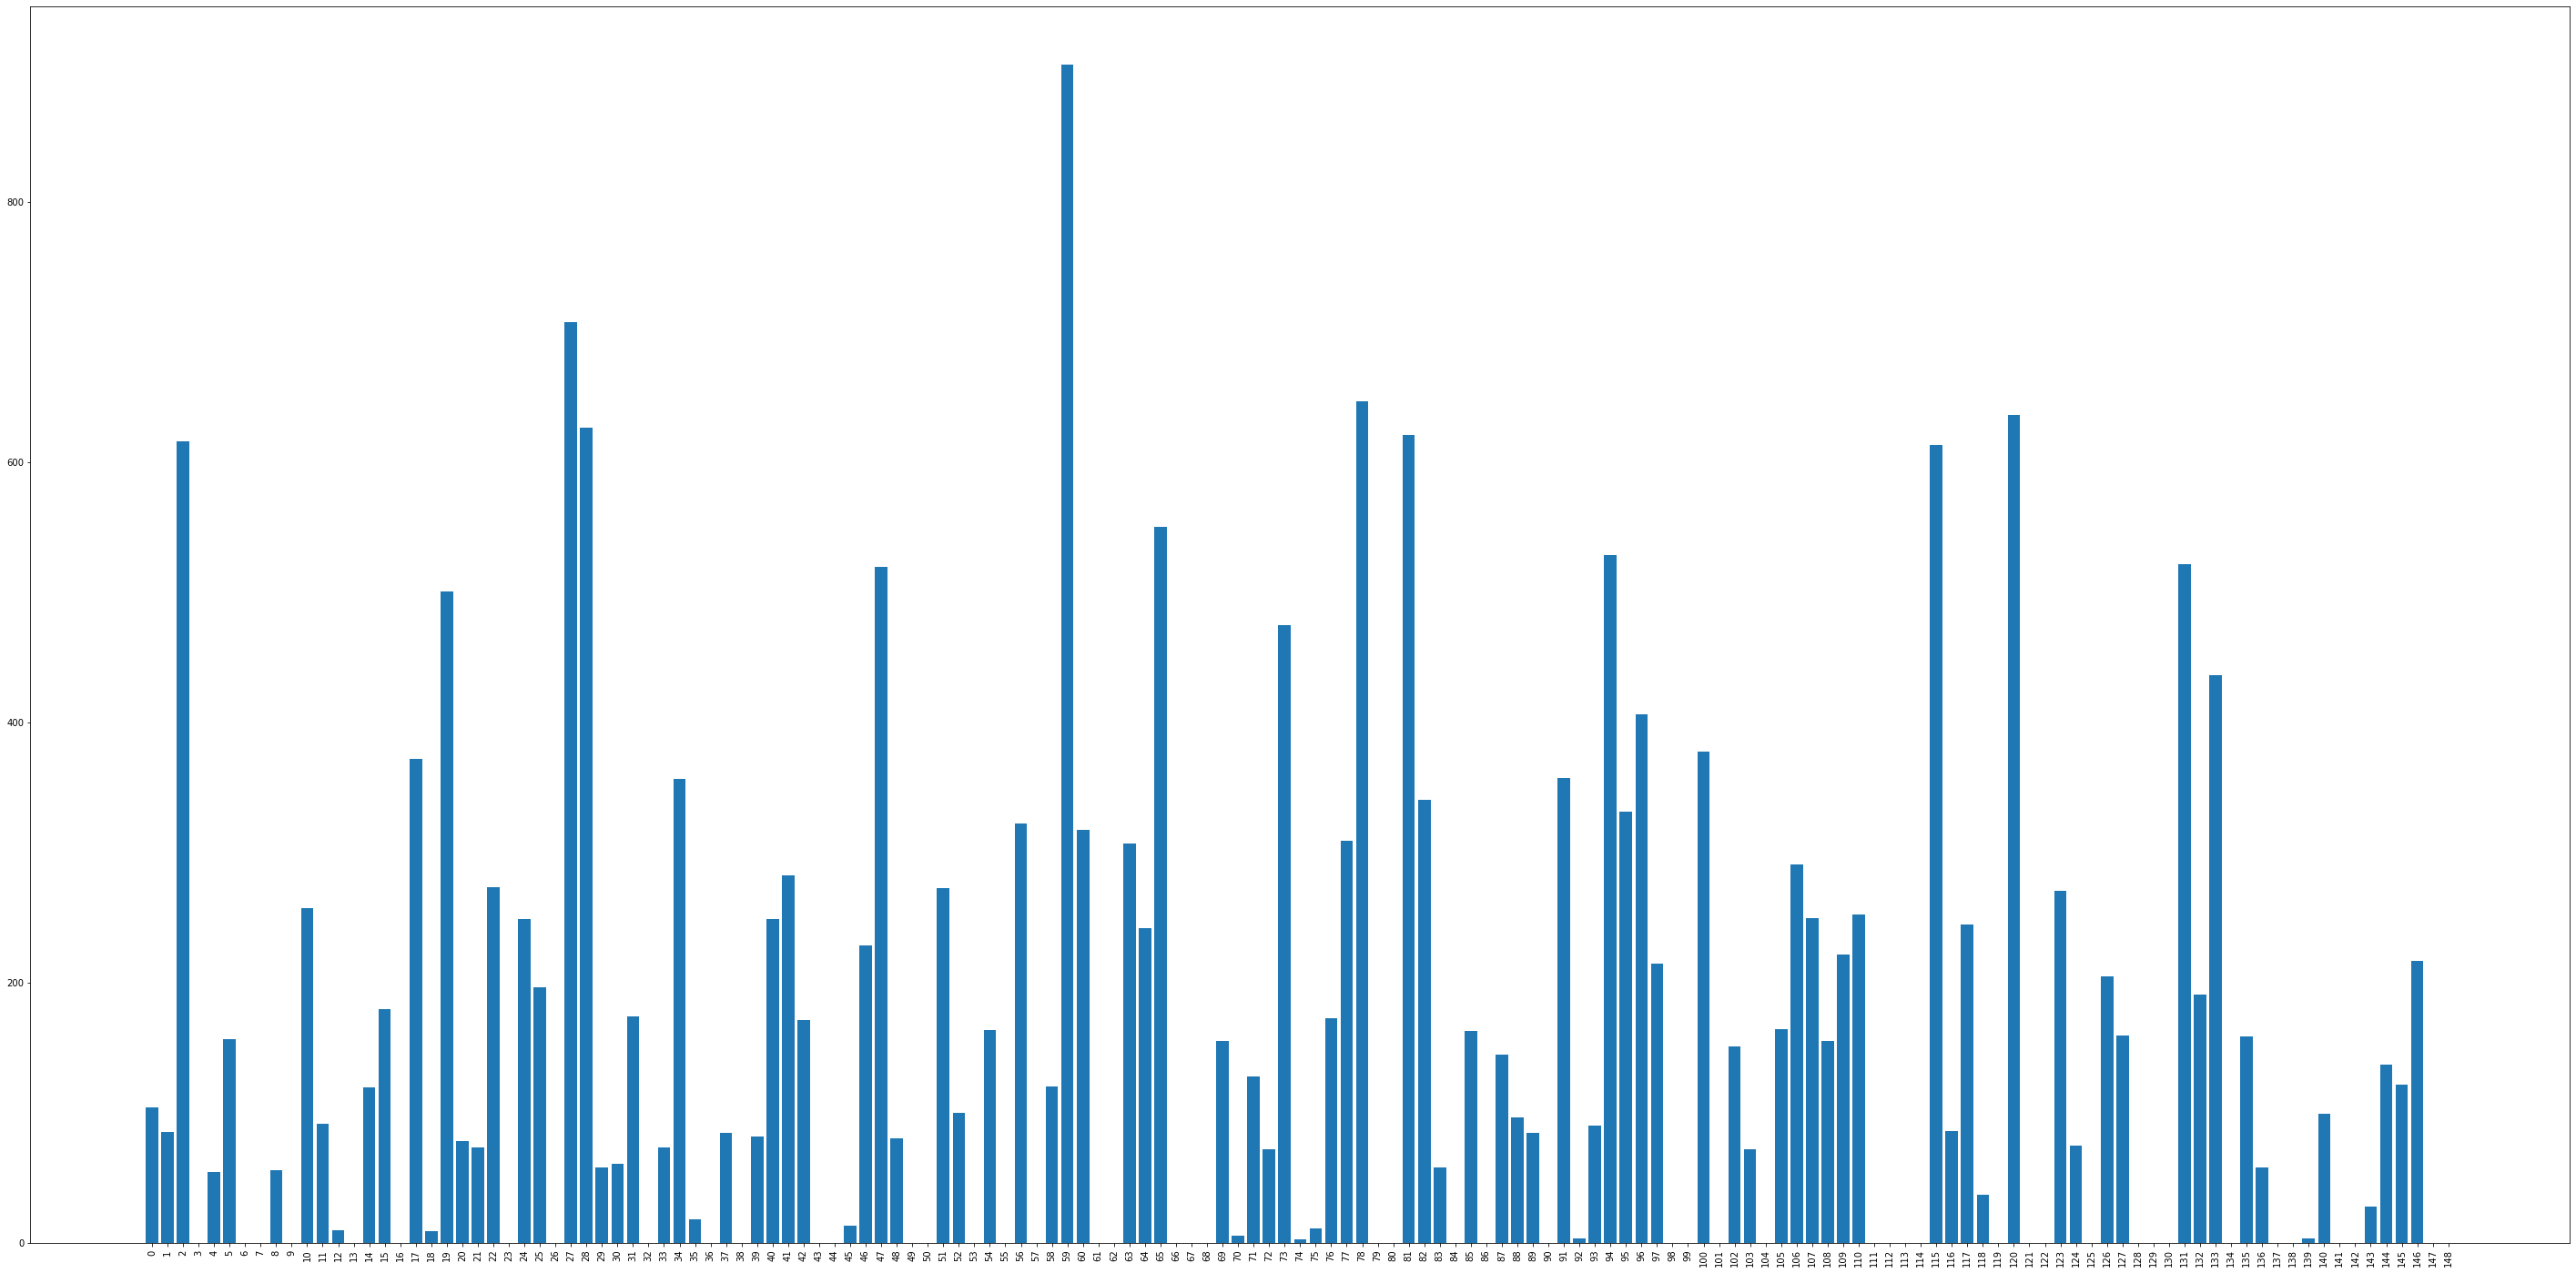

In [26]:
# Check undernourishment column for data amounts  44%  of data is Null

x = country['Entity'].tolist()
y = country['Prevalence of undernourishment (%) - SN_ITK_DEFC - 2.1.1']

plt.figure(figsize=(50, 25))
plt.bar(x, y)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticks(), rotation = 90)

plt.show()

In [27]:
# Delete Columns with insufficient Data

eco_cancer_data = cancer_clean_df.drop(columns=['Prevalence of undernourishment (%) - SN_ITK_DEFC - 2.1.1',
                                  'Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1',
                                  'Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1'], axis=1)
# Create list of final columns
final_column = eco_cancer_data.columns

eco_cancer_data.shape

(2831, 37)

In [28]:
# Rename columns to more manageable lengths

# Create list of new column names

rename = ['Country', 'Year',
       'Liver cancer',
       'Kidney cancer',
       'Tracheal, bronchus, and lung cancer',
       'Malignant skin melanoma',
       'Leukemia',
       'Breast cancer',
       'Prostate cancer',
       'Thyroid cancer',
       'Bladder cancer',
       'Uterine cancer',
       'Ovarian cancer',
       'Cervical cancer',
       'Non-Hodgkin lymphoma',
       'Pancreatic cancer',
       'Colon and rectum cancer',
       'Access to electricity (% of population)',
       'Adjusted savings: carbon dioxide damage (% of GNI)',
       'Adjusted savings: natural resources depletion (% of GNI)',
       'Adjusted savings: net forest depletion (% of GNI)',
       'Adjusted savings: particulate emission damage (% of GNI)',
       'Final consumption expenditure (% of GDP)',
       'GDP (current US$)', 'Continent',
       'General government final consumption expenditure (% of GDP)',
       'Inflation (annual %)',
       'Renewable energy consumption',
       'Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes',
       'Income Classification (World Bank Definition)',
       'Life expectancy at birth, total (years)',
       'Population',
       'Regime Type (RoW Measure Definition)',
       'Rural population (% of total population)',
       'Total natural resources rents (% of GDP)',
       'Urban population (% of total population)',
       'World Regions']

# Create dictionary of new and old column names
dictionary = dict(zip(final_column, rename))

# Rename columns
eco_cancer_data.rename(columns=dictionary, inplace=True)

# Check Column Names
eco_cancer_data.head()

,Country,Year,Liver cancer,Kidney cancer,"Tracheal, bronchus, and lung cancer",Malignant skin melanoma,Leukemia,Breast cancer,Prostate cancer,Thyroid cancer,...,Renewable energy consumption,"Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Income Classification (World Bank Definition),"Life expectancy at birth, total (years)",Population,Regime Type (RoW Measure Definition),Rural population (% of total population),Total natural resources rents (% of GDP),Urban population (% of total population),World Regions
0,Albania,2000,316,40,748,23,125,162,192,14,...,41.445000,3.004,Lower-middle income,NaN,NaN,Electoral Autocracy,58.259,NaN,NaN,Europe and Northern America
1,Albania,2001,301,42,734,21,121,163,195,14,...,39.125301,3.221,Lower-middle income,74.288,3060173.0,Electoral Autocracy,57.565,0.755950,42.435,Europe and Northern America
2,Albania,2002,295,47,765,21,124,175,206,14,...,35.895802,3.748,Lower-middle income,74.579,3051010.0,Electoral Autocracy,56.499,0.760798,43.501,Europe and Northern America
3,Albania,2003,290,53,806,21,129,191,219,15,...,33.751701,4.232,Lower-middle income,74.828,3039616.0,Electoral Autocracy,55.427,0.733194,44.573,Europe and Northern America
4,Albania,2004,272,57,817,21,132,198,227,15,...,35.934700,4.104,Lower-middle income,75.039,3026939.0,Electoral Autocracy,54.349,0.770849,45.651,Europe and Northern America


In [29]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [31]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [32]:
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [39]:
eco_cancer_data.describe()

,Year,Liver cancer,Kidney cancer,"Tracheal, bronchus, and lung cancer",Malignant skin melanoma,Leukemia,Breast cancer,Prostate cancer,Thyroid cancer,Bladder cancer,...,GDP (current US$),General government final consumption expenditure (% of GDP),Inflation (annual %),Renewable energy consumption,"Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes","Life expectancy at birth, total (years)",Population,Rural population (% of total population),Total natural resources rents (% of GDP),Urban population (% of total population)
count,2831.000000,2831.000000,2831.000000,2831.000000,2831.000000,2831.000000,2831.000000,2831.000000,2831.000000,2831.000000,...,2.824000e+03,2656.000000,2668.000000,2831.000000,2831.000000,2665.000000,2.675000e+03,2824.000000,2667.000000,2675.000000
mean,2009.000000,2437.903214,752.063229,10088.064995,312.340162,1812.088661,3407.553868,2315.472978,219.278347,1076.907100,...,3.782904e+11,15.991806,5.536621,34.741754,180.130789,69.973794,4.159759e+07,43.465799,6.691946,56.708438
std,5.478193,14561.301111,2179.037663,48810.528460,965.385335,5987.478807,9204.646875,5592.483174,683.872398,3232.194255,...,1.498909e+12,5.646997,10.553222,30.066233,804.643788,9.519322,1.515087e+08,22.836347,10.235752,22.815164
min,2000.000000,2.000000,1.000000,6.000000,0.000000,3.000000,8.000000,4.000000,0.000000,1.000000,...,1.811170e+08,0.951747,-18.108630,0.000000,0.048000,40.369000,6.967100e+04,0.000000,0.000000,8.461000
25%,2004.000000,75.000000,27.500000,267.500000,11.000000,118.000000,205.500000,166.000000,8.000000,43.000000,...,7.629162e+09,11.916095,1.675110,8.397500,3.000500,64.135000,2.858701e+06,24.572500,0.518129,38.517500
50%,2009.000000,255.000000,114.000000,1057.000000,47.000000,347.000000,679.000000,511.000000,34.000000,189.000000,...,2.721322e+10,15.858810,3.521335,27.097799,13.927000,72.648780,8.958406e+06,42.943500,2.139457,57.117000
75%,2014.000000,834.500000,469.500000,4144.500000,209.500000,978.000000,2062.000000,1709.500000,121.500000,595.000000,...,1.791360e+11,19.273317,6.803277,58.804951,71.858500,76.895122,2.627425e+07,61.855750,8.418138,75.689500
max,2018.000000,278157.000000,22732.000000,726644.000000,11624.000000,66356.000000,93224.000000,51932.000000,7036.000000,38310.000000,...,2.061190e+13,54.796768,324.996872,96.041100,9956.569000,84.210976,1.392730e+09,91.754000,66.690018,100.000000


(array([2.79e+03, 2.20e+01, 0.00e+00, 0.00e+00, 0.00e+00, 1.20e+01,
        4.00e+00, 1.00e+00, 1.00e+00, 1.00e+00]),
 array([2.000000e+00, 2.781750e+04, 5.563300e+04, 8.344850e+04,
        1.112640e+05, 1.390795e+05, 1.668950e+05, 1.947105e+05,
        2.225260e+05, 2.503415e+05, 2.781570e+05]),
 <BarContainer object of 10 artists>)

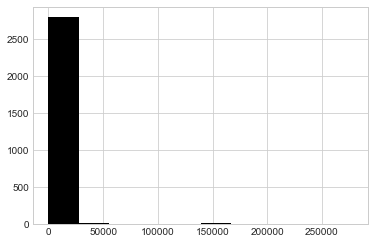

In [82]:
plt.hist(eco_cancer_data["Liver cancer"], color = "black")

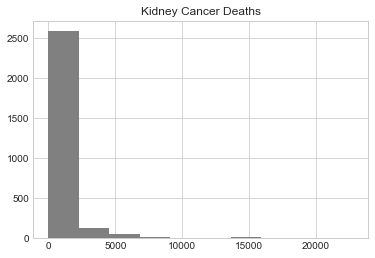

In [81]:
plt.hist(eco_cancer_data["Kidney cancer"], color = "gray")
plt.title("Kidney Cancer Deaths")
plt.show()

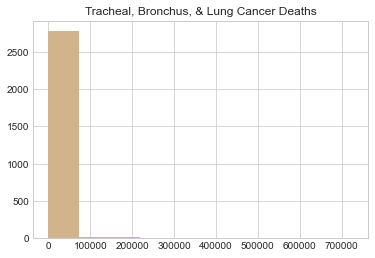

In [79]:
plt.hist(eco_cancer_data["Tracheal, bronchus, and lung cancer"], color = "tan")
plt.title("Tracheal, Bronchus, & Lung Cancer Deaths")
plt.show()

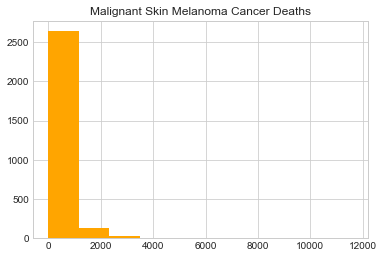

In [78]:
plt.hist(eco_cancer_data["Malignant skin melanoma"], color = "orange")
plt.title("Malignant Skin Melanoma Cancer Deaths")
plt.show()
#add line graph

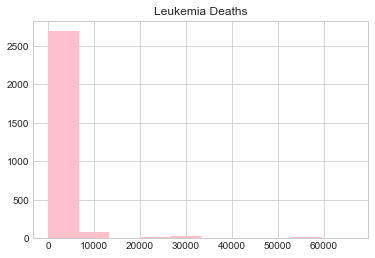

In [77]:
plt.hist(eco_cancer_data["Leukemia"], color = "pink")
plt.title("Leukemia Deaths")
plt.show()

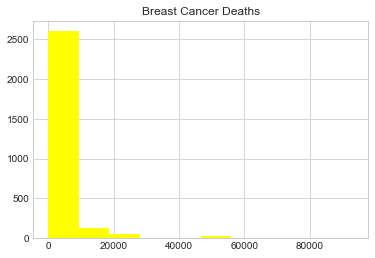

In [76]:
plt.hist(eco_cancer_data["Breast cancer"], color = "yellow")
plt.title("Breast Cancer Deaths")
plt.show()

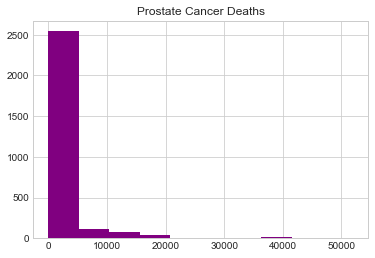

In [75]:
plt.hist(eco_cancer_data["Prostate cancer"], color = "purple")
plt.title("Prostate Cancer Deaths")
plt.show()

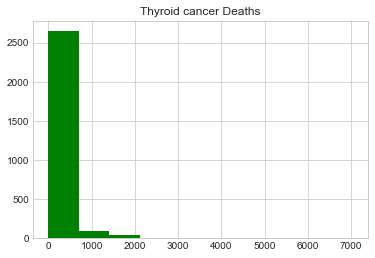

In [73]:
plt.hist(eco_cancer_data["Thyroid cancer"], color = "green")
plt.title("Thyroid cancer Deaths")
plt.show()

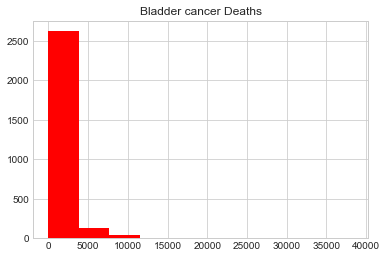

In [74]:
plt.hist(eco_cancer_data["Bladder cancer"], color = "red")
plt.title("Bladder cancer Deaths")
plt.show()

In [83]:
eco_cancer_data.shape

(2831, 37)

In [89]:
#Encoded Features: Turning Categorical Variables to Numerical Variables
#1 = Associated with the column. 0 = Variable not presented in the column
eco_cancer_encoded = pd.get_dummies(eco_cancer_data, columns=["Income Classification (World Bank Definition)","Regime Type (RoW Measure Definition)", "World Regions"])
eco_cancer_encoded.head()

,Country,Year,Liver cancer,Kidney cancer,"Tracheal, bronchus, and lung cancer",Malignant skin melanoma,Leukemia,Breast cancer,Prostate cancer,Thyroid cancer,...,Regime Type (RoW Measure Definition)_Electoral Autocracy,Regime Type (RoW Measure Definition)_Electoral Democracy,Regime Type (RoW Measure Definition)_Liberal Democracy,World Regions_Central and Southern Asia,World Regions_Eastern and South-Eastern Asia,World Regions_Europe and Northern America,World Regions_Latin America and Caribbean,World Regions_Northern Africa and Western Asia,World Regions_Oceania,World Regions_Sub-Saharan Africa
0,Albania,2000,316,40,748,23,125,162,192,14,...,1,0,0,0,0,1,0,0,0,0
1,Albania,2001,301,42,734,21,121,163,195,14,...,1,0,0,0,0,1,0,0,0,0
2,Albania,2002,295,47,765,21,124,175,206,14,...,1,0,0,0,0,1,0,0,0,0
3,Albania,2003,290,53,806,21,129,191,219,15,...,1,0,0,0,0,1,0,0,0,0
4,Albania,2004,272,57,817,21,132,198,227,15,...,1,0,0,0,0,1,0,0,0,0


In [90]:
#Check Null Values of the encoded values
for name in eco_cancer_encoded:
    null = eco_cancer_encoded[name].isnull().sum(axis=0)
    print(f'{name} has {perc_null} nulls')

Country has 0.0 nulls
Year has 0.0 nulls
Liver cancer has 0.0 nulls
Kidney cancer has 0.0 nulls
Tracheal, bronchus, and lung cancer has 0.0 nulls
Malignant skin melanoma has 0.0 nulls
Leukemia has 0.0 nulls
Breast cancer has 0.0 nulls
Prostate cancer has 0.0 nulls
Thyroid cancer has 0.0 nulls
Bladder cancer has 0.0 nulls
Uterine cancer has 0.0 nulls
Ovarian cancer has 0.0 nulls
Cervical cancer has 0.0 nulls
Non-Hodgkin lymphoma has 0.0 nulls
Pancreatic cancer has 0.0 nulls
Colon and rectum cancer has 0.0 nulls
Access to electricity (% of population) has 0.0 nulls
Adjusted savings: carbon dioxide damage (% of GNI) has 0.0 nulls
Adjusted savings: natural resources depletion (% of GNI) has 0.0 nulls
Adjusted savings: net forest depletion (% of GNI) has 0.0 nulls
Adjusted savings: particulate emission damage (% of GNI) has 0.0 nulls
Final consumption expenditure (% of GDP) has 0.0 nulls
GDP (current US$) has 0.0 nulls
Continent has 0.0 nulls
General government final consumption expenditure

In [95]:
#Encoded Features: Turning Categorical Variables to Numerical Variables Using LabelEncoder: Income Classification
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ecd = eco_cancer_data
ecd["Income Classification (World Bank Definition)"] = le.fit_transform(ecd["Income Classification (World Bank Definition)"])

In [96]:
ecd.head()

,Country,Year,Liver cancer,Kidney cancer,"Tracheal, bronchus, and lung cancer",Malignant skin melanoma,Leukemia,Breast cancer,Prostate cancer,Thyroid cancer,...,Renewable energy consumption,"Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Income Classification (World Bank Definition),"Life expectancy at birth, total (years)",Population,Regime Type (RoW Measure Definition),Rural population (% of total population),Total natural resources rents (% of GDP),Urban population (% of total population),World Regions
0,Albania,2000,316,40,748,23,125,162,192,14,...,41.445000,3.004,2,NaN,NaN,Electoral Autocracy,58.259,NaN,NaN,Europe and Northern America
1,Albania,2001,301,42,734,21,121,163,195,14,...,39.125301,3.221,2,74.288,3060173.0,Electoral Autocracy,57.565,0.755950,42.435,Europe and Northern America
2,Albania,2002,295,47,765,21,124,175,206,14,...,35.895802,3.748,2,74.579,3051010.0,Electoral Autocracy,56.499,0.760798,43.501,Europe and Northern America
3,Albania,2003,290,53,806,21,129,191,219,15,...,33.751701,4.232,2,74.828,3039616.0,Electoral Autocracy,55.427,0.733194,44.573,Europe and Northern America
4,Albania,2004,272,57,817,21,132,198,227,15,...,35.934700,4.104,2,75.039,3026939.0,Electoral Autocracy,54.349,0.770849,45.651,Europe and Northern America


In [98]:
#Encoded Features: Turning Categorical Variables to Numerical Variables Using LabelEncoder: Regime Type
ecd1 = ecd
ecd1["Regime Type (RoW Measure Definition)"] = le.fit_transform(ecd1["Regime Type (RoW Measure Definition)"])

In [99]:
ecd1

,Country,Year,Liver cancer,Kidney cancer,"Tracheal, bronchus, and lung cancer",Malignant skin melanoma,Leukemia,Breast cancer,Prostate cancer,Thyroid cancer,...,Renewable energy consumption,"Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Income Classification (World Bank Definition),"Life expectancy at birth, total (years)",Population,Regime Type (RoW Measure Definition),Rural population (% of total population),Total natural resources rents (% of GDP),Urban population (% of total population),World Regions
0,Albania,2000,316,40,748,23,125,162,192,14,...,41.445000,3.004,2,NaN,NaN,1,58.259,NaN,NaN,Europe and Northern America
1,Albania,2001,301,42,734,21,121,163,195,14,...,39.125301,3.221,2,74.288,3060173.0,1,57.565,0.755950,42.435,Europe and Northern America
2,Albania,2002,295,47,765,21,124,175,206,14,...,35.895802,3.748,2,74.579,3051010.0,1,56.499,0.760798,43.501,Europe and Northern America
3,Albania,2003,290,53,806,21,129,191,219,15,...,33.751701,4.232,2,74.828,3039616.0,1,55.427,0.733194,44.573,Europe and Northern America
4,Albania,2004,272,57,817,21,132,198,227,15,...,35.934700,4.104,2,75.039,3026939.0,1,54.349,0.770849,45.651,Europe and Northern America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826,Zimbabwe,2014,931,56,872,121,235,999,1071,67,...,80.775002,11.973,1,58.410,13586710.0,1,67.496,5.531514,32.504,Sub-Saharan Africa
2827,Zimbabwe,2015,948,59,902,125,243,1033,1098,68,...,81.427200,12.170,1,59.534,13814642.0,1,67.615,4.561981,32.385,Sub-Saharan Africa
2828,Zimbabwe,2016,966,61,932,129,251,1067,1125,70,...,82.792603,10.815,1,60.294,14030338.0,1,67.704,4.473632,32.296,Sub-Saharan Africa
2829,Zimbabwe,2017,982,63,960,133,257,1097,1151,72,...,83.492996,10.247,1,60.812,14236599.0,1,67.763,4.844665,32.237,Sub-Saharan Africa


In [100]:
#Encoded Features: Turning Categorical Variables to Numerical Variables Using LabelEncoder: World Regions
ecd2 = ecd1
ecd2["World Regions"] = le.fit_transform(ecd2["World Regions"])

In [101]:
ecd2

,Country,Year,Liver cancer,Kidney cancer,"Tracheal, bronchus, and lung cancer",Malignant skin melanoma,Leukemia,Breast cancer,Prostate cancer,Thyroid cancer,...,Renewable energy consumption,"Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Income Classification (World Bank Definition),"Life expectancy at birth, total (years)",Population,Regime Type (RoW Measure Definition),Rural population (% of total population),Total natural resources rents (% of GDP),Urban population (% of total population),World Regions
0,Albania,2000,316,40,748,23,125,162,192,14,...,41.445000,3.004,2,NaN,NaN,1,58.259,NaN,NaN,2
1,Albania,2001,301,42,734,21,121,163,195,14,...,39.125301,3.221,2,74.288,3060173.0,1,57.565,0.755950,42.435,2
2,Albania,2002,295,47,765,21,124,175,206,14,...,35.895802,3.748,2,74.579,3051010.0,1,56.499,0.760798,43.501,2
3,Albania,2003,290,53,806,21,129,191,219,15,...,33.751701,4.232,2,74.828,3039616.0,1,55.427,0.733194,44.573,2
4,Albania,2004,272,57,817,21,132,198,227,15,...,35.934700,4.104,2,75.039,3026939.0,1,54.349,0.770849,45.651,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826,Zimbabwe,2014,931,56,872,121,235,999,1071,67,...,80.775002,11.973,1,58.410,13586710.0,1,67.496,5.531514,32.504,6
2827,Zimbabwe,2015,948,59,902,125,243,1033,1098,68,...,81.427200,12.170,1,59.534,13814642.0,1,67.615,4.561981,32.385,6
2828,Zimbabwe,2016,966,61,932,129,251,1067,1125,70,...,82.792603,10.815,1,60.294,14030338.0,1,67.704,4.473632,32.296,6
2829,Zimbabwe,2017,982,63,960,133,257,1097,1151,72,...,83.492996,10.247,1,60.812,14236599.0,1,67.763,4.844665,32.237,6


In [111]:
#Encoded Features: Turning Categorical Variables to Numerical Variables Using LabelEncoder: Countries
ecd3 = ecd2
ecd3["Country"] = le.fit_transform(ecd3["Country"])

In [112]:
ecd3.head(10)

,Country,Year,Liver cancer,Kidney cancer,"Tracheal, bronchus, and lung cancer",Malignant skin melanoma,Leukemia,Breast cancer,Prostate cancer,Thyroid cancer,...,Renewable energy consumption,"Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Income Classification (World Bank Definition),"Life expectancy at birth, total (years)",Population,Regime Type (RoW Measure Definition),Rural population (% of total population),Total natural resources rents (% of GDP),Urban population (% of total population),World Regions
0,0,2000,316,40,748,23,125,162,192,14,...,41.445000,3.004,2,NaN,NaN,1,58.259,NaN,NaN,2
1,0,2001,301,42,734,21,121,163,195,14,...,39.125301,3.221,2,74.288,3060173.0,1,57.565,0.755950,42.435,2
2,0,2002,295,47,765,21,124,175,206,14,...,35.895802,3.748,2,74.579,3051010.0,1,56.499,0.760798,43.501,2
3,0,2003,290,53,806,21,129,191,219,15,...,33.751701,4.232,2,74.828,3039616.0,1,55.427,0.733194,44.573,2
4,0,2004,272,57,817,21,132,198,227,15,...,35.934700,4.104,2,75.039,3026939.0,1,54.349,0.770849,45.651,2
5,0,2005,246,60,804,20,131,208,230,15,...,36.868301,4.199,2,75.228,3011487.0,2,53.269,1.018382,46.731,2
6,0,2006,224,61,780,20,126,210,229,14,...,31.709900,3.844,2,75.423,2992547.0,2,52.185,1.321831,47.815,2
7,0,2007,211,63,768,20,122,209,233,13,...,32.100399,3.829,2,75.646,2970017.0,2,51.098,1.761086,48.902,2
8,0,2008,208,66,796,20,125,219,245,13,...,35.911900,4.272,2,75.912,2947314.0,2,50.009,1.109999,49.991,2
9,0,2009,207,67,809,21,126,220,256,14,...,37.215199,4.254,3,76.221,2927519.0,2,48.924,0.605980,51.076,2


In [122]:
ecd3.head(10)

,Country,Year,Liver cancer,Kidney cancer,"Tracheal, bronchus, and lung cancer",Malignant skin melanoma,Leukemia,Breast cancer,Prostate cancer,Thyroid cancer,...,Renewable energy consumption,"Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Income Classification (World Bank Definition),"Life expectancy at birth, total (years)",Population,Regime Type (RoW Measure Definition),Rural population (% of total population),Total natural resources rents (% of GDP),Urban population (% of total population),World Regions
0,0,2000,316,40,748,23,125,162,192,14,...,41.445000,3.004,2,NaN,NaN,1,58.259,NaN,NaN,2
1,0,2001,301,42,734,21,121,163,195,14,...,39.125301,3.221,2,74.288,3060173.0,1,57.565,0.755950,42.435,2
2,0,2002,295,47,765,21,124,175,206,14,...,35.895802,3.748,2,74.579,3051010.0,1,56.499,0.760798,43.501,2
3,0,2003,290,53,806,21,129,191,219,15,...,33.751701,4.232,2,74.828,3039616.0,1,55.427,0.733194,44.573,2
4,0,2004,272,57,817,21,132,198,227,15,...,35.934700,4.104,2,75.039,3026939.0,1,54.349,0.770849,45.651,2
5,0,2005,246,60,804,20,131,208,230,15,...,36.868301,4.199,2,75.228,3011487.0,2,53.269,1.018382,46.731,2
6,0,2006,224,61,780,20,126,210,229,14,...,31.709900,3.844,2,75.423,2992547.0,2,52.185,1.321831,47.815,2
7,0,2007,211,63,768,20,122,209,233,13,...,32.100399,3.829,2,75.646,2970017.0,2,51.098,1.761086,48.902,2
8,0,2008,208,66,796,20,125,219,245,13,...,35.911900,4.272,2,75.912,2947314.0,2,50.009,1.109999,49.991,2
9,0,2009,207,67,809,21,126,220,256,14,...,37.215199,4.254,3,76.221,2927519.0,2,48.924,0.605980,51.076,2


In [123]:
#Encoded Features: Turning Categorical Variables to Numerical Variables Using LabelEncoder: Countries
ecd4 = ecd3
ecd4["Continent"] = le.fit_transform(ecd4["Continent"])

In [191]:
ecd4.tail()

,Country,Year,Liver,Kidney,TBL,Melanoma,Leukemia,Breast,Prostate,Thyroid,...,Renewable_Energy,C02_Annual,Income,Life_Expectancty,Population,Regime,Rural,NR_Rents,Urban,Regions
2826,148,2014,931,56,872,121,235,999,1071,67,...,80.775002,11.973,1,58.410,13586710.0,1,67.496,5.531514,32.504,6
2827,148,2015,948,59,902,125,243,1033,1098,68,...,81.427200,12.170,1,59.534,13814642.0,1,67.615,4.561981,32.385,6
2828,148,2016,966,61,932,129,251,1067,1125,70,...,82.792603,10.815,1,60.294,14030338.0,1,67.704,4.473632,32.296,6
2829,148,2017,982,63,960,133,257,1097,1151,72,...,83.492996,10.247,1,60.812,14236599.0,1,67.763,4.844665,32.237,6
2830,148,2018,998,66,993,137,262,1129,1182,73,...,81.363602,11.341,1,61.195,14438812.0,1,67.791,4.363782,32.209,6


In [167]:
#Renamimg Columns

ecd4.rename(columns= { "Liver cancer": "Liver",
                     "Kidney cancer": "Kidney",
                     "Tracheal, bronchus, and lung cancer": "TBL",
                     "Malignant skin melanoma":"Melanoma",  
                      'Breast cancer': "Breast",
                     'Prostate cancer': "Prostate",
                     'Thyroid cancer': "Thyroid",
                      'Bladder cancer': "Bladder",
                       'Uterine cancer': "Uterine ",
                     'Ovarian cancer': "Ovarian ",
                     'Cervical cancer': "Cervical ",
                      'Non-Hodgkin lymphoma': "NHlymphoma ",
                     'Pancreatic cancer': "Pancreatic",
                      'Colon and rectum cancer':"CR",
                       'Access to electricity (% of population)': 'Electricity_Access',
                       'Adjusted savings: carbon dioxide damage (% of GNI)': "C02_Damage",
                       'Adjusted savings: natural resources depletion (% of GNI)': "NR_Depletion",
                      'Adjusted savings: net forest depletion (% of GNI)': "Forest_Depletion",
                      'Adjusted savings: particulate emission damage (% of GNI)':'Emission_Damage',
                      'Final consumption expenditure (% of GDP)':"Expenditure",
                      'GDP (current US$)':'GDP',
                      'General government final consumption expenditure (% of GDP)': 'Final_Expenditure',
                        'Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes': "C02_Annual",
                      'Inflation (annual %)':"Inflation", 'Renewable energy consumption': "Renewable_Energy",
                      'Income Classification (World Bank Definition)': "Income",
                      'Life expectancy at birth, total (years)': "Life_Expectancty",
                       'Regime Type (RoW Measure Definition)': 'Regime',
                      'Rural population (% of total population)': "Rural",
                       'Total natural resources rents (% of GDP)': "NR_Rents",
                      'Urban population (% of total population)': "Urban",
                      'World Regions': "Regions"}, inplace = True)


In [168]:
print(ecd4.columns)

Index(['Country', 'Year', 'Liver', 'Kidney', 'TBL', 'Melanoma', 'Leukemia',
       'Breast', 'Prostate', 'Thyroid', 'Bladder', 'Uterine ', 'Ovarian ',
       'Cervical ', 'NHlymphoma ', 'Pancreatic', 'CR', 'Electricity_Access',
       'C02_Damage', 'NR_Depletion', 'Forest_Depletion', 'Emission_Damage',
       'Expenditure', 'GDP', 'Continent', 'Final_Expenditure', 'Inflation',
       'Renewable_Energy', 'C02_Annual', 'Income', 'Life_Expectancty',
       'Population', 'Regime', 'Rural', 'NR_Rents', 'Urban', 'Regions'],
      dtype='object')


In [ ]:
#Data Visualization
#Need a key

Text(0.5, 1.0, 'Leukemia Deaths Per Continent')

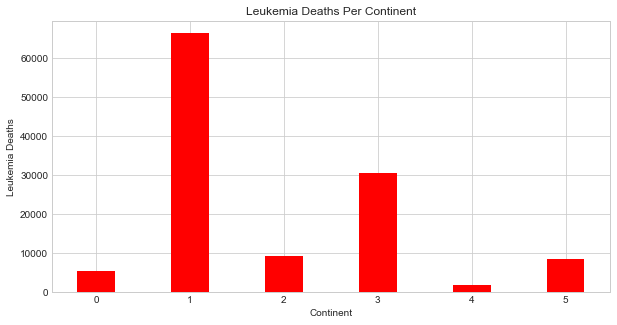

In [192]:
fig = plt.figure(figsize=(10,5))
plt.bar(ecd4.Continent, ecd4.Leukemia, color = "red", width = 0.4)
plt.xlabel('Continent')
plt.ylabel('Leukemia Deaths')
plt.title("Leukemia Deaths Per Continent")

Text(0.5, 1.0, 'Liver Cancer Deaths Per Continent')

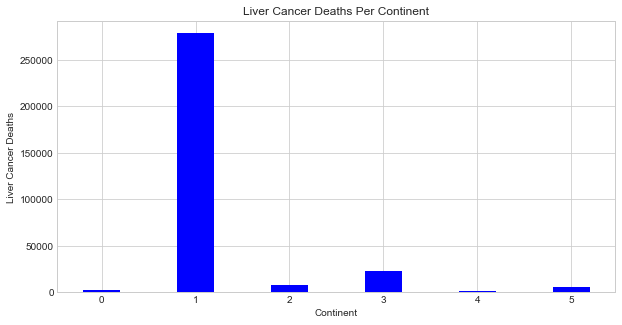

In [193]:
fig = plt.figure(figsize=(10,5))
plt.bar(ecd4.Continent, ecd4.Liver, color = "blue", width = 0.4)
plt.xlabel('Continent')
plt.ylabel('Liver Cancer Deaths')
plt.title("Liver Cancer Deaths Per Continent")

Text(0.5, 1.0, 'Kidney Cancer Deaths Per Continent')

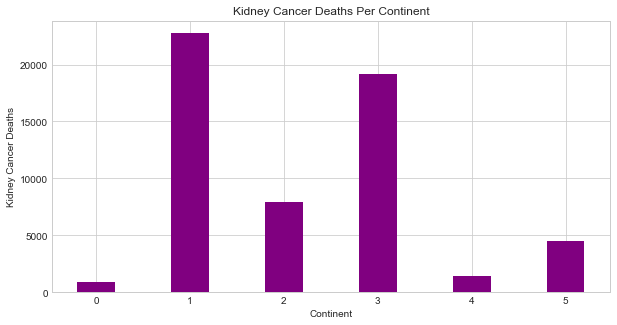

In [194]:
fig = plt.figure(figsize=(10,5))
plt.bar(ecd4.Continent, ecd4.Kidney, color = "purple", width = 0.4)
plt.xlabel('Continent')
plt.ylabel('Kidney Cancer Deaths')
plt.title("Kidney Cancer Deaths Per Continent")

Text(0.5, 1.0, 'Throat, Bronchol, and Lung Cancer Deaths Per Continent')

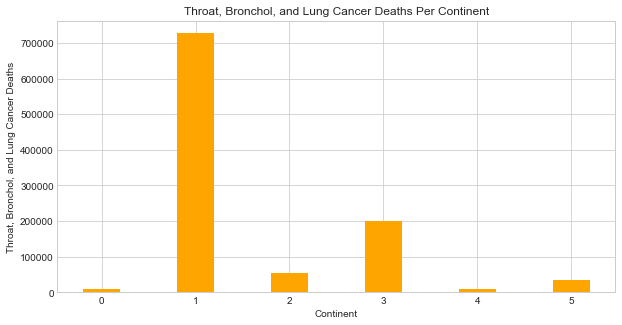

In [196]:
fig = plt.figure(figsize=(10,5))
plt.bar(ecd4.Continent, ecd4.TBL, color = "orange", width = 0.4)
plt.xlabel('Continent')
plt.ylabel('Throat, Bronchol, and Lung Cancer Deaths')
plt.title("Throat, Bronchol, and Lung Cancer Deaths Per Continent")

Text(0.5, 1.0, 'Melanoma Deaths Per Continent')

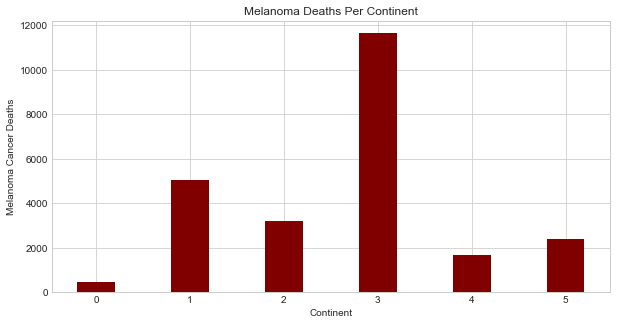

In [197]:
fig = plt.figure(figsize=(10,5))
plt.bar(ecd4.Continent, ecd4.Melanoma, color = "maroon", width = 0.4)
plt.xlabel('Continent')
plt.ylabel('Melanoma Cancer Deaths')
plt.title("Melanoma Deaths Per Continent")

Text(0.5, 1.0, 'Breast Cancer Deaths Per Continent')

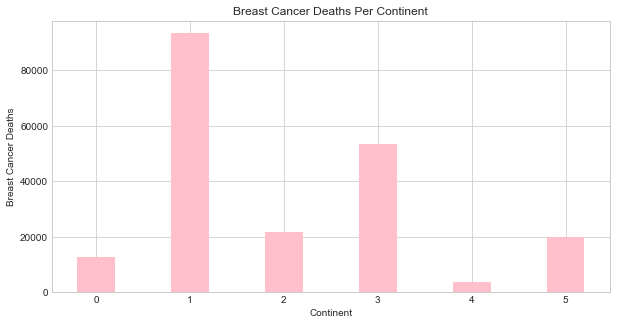

In [198]:
fig = plt.figure(figsize=(10,5))
plt.bar(ecd4.Continent, ecd4.Breast, color = "pink", width = 0.4)
plt.xlabel('Continent')
plt.ylabel('Breast Cancer Deaths')
plt.title("Breast Cancer Deaths Per Continent")

Text(0.5, 1.0, 'Prostate Cancer Deaths Per Continent')

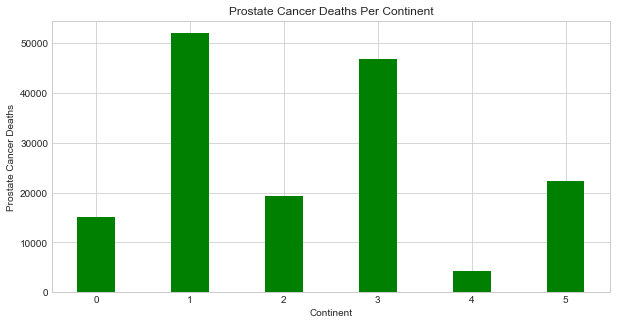

In [200]:
fig = plt.figure(figsize=(10,5))
plt.bar(ecd4.Continent, ecd4.Prostate, color = "green", width = 0.4)
plt.xlabel('Continent')
plt.ylabel('Prostate Cancer Deaths')
plt.title("Prostate Cancer Deaths Per Continent") 

Text(0.5, 1.0, 'Thyroid Cancer Deaths Per Continent')

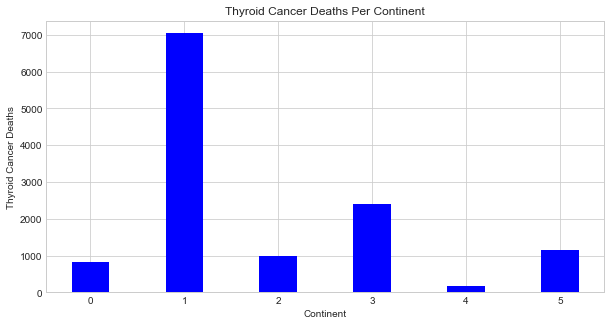

In [202]:
fig = plt.figure(figsize=(10,5))
plt.bar(ecd4.Continent, ecd4.Thyroid, color = "blue", width = 0.4)
plt.xlabel('Continent')
plt.ylabel('Thyroid Cancer Deaths')
plt.title("Thyroid Cancer Deaths Per Continent") 

In [ ]:
#5. Export the Dataframe as a new CSV file without the index.
ecd_csv = ecd3.to_csv("ecd.csv", index = False)


In [249]:
ecd1_csv = ecd4.to_csv("ecd1.csv", index = False)

In [239]:
print(np.mean(ecd_scaled[:,0]))
print(np.std(ecd_scaled[:,0]))

8.031567482982411e-17
0.9999999999999998


In [269]:
ecd4.isnull().sum()

Country                 0
Year                    0
Liver                   0
Kidney                  0
TBL                     0
Melanoma                0
Leukemia                0
Breast                  0
Prostate                0
Thyroid                 0
Bladder                 0
Uterine                 0
Ovarian                 0
Cervical                0
NHlymphoma              0
Pancreatic              0
CR                      0
Electricity_Access     74
C02_Damage             30
NR_Depletion           90
Forest_Depletion       84
Emission_Damage        89
Expenditure           159
GDP                     7
Continent               0
Final_Expenditure     175
Inflation             163
Renewable_Energy        0
C02_Annual              0
Income                  0
Life_Expectancty      166
Population            156
Regime                  0
Rural                   7
NR_Rents              164
Urban                 156
Regions                 0
dtype: int64

In [271]:
ecd4.notnull().sum()

Country               2831
Year                  2831
Liver                 2831
Kidney                2831
TBL                   2831
Melanoma              2831
Leukemia              2831
Breast                2831
Prostate              2831
Thyroid               2831
Bladder               2831
Uterine               2831
Ovarian               2831
Cervical              2831
NHlymphoma            2831
Pancreatic            2831
CR                    2831
Electricity_Access    2757
C02_Damage            2801
NR_Depletion          2741
Forest_Depletion      2747
Emission_Damage       2742
Expenditure           2672
GDP                   2824
Continent             2831
Final_Expenditure     2656
Inflation             2668
Renewable_Energy      2831
C02_Annual            2831
Income                2831
Life_Expectancty      2665
Population            2675
Regime                2831
Rural                 2824
NR_Rents              2667
Urban                 2675
Regions               2831
d

In [ ]:
# #Scale and Normalize the Data
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
ecd_scaled = data_scaler.fit_transform(ecd4)
ecd_scaled.shape

In [237]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
    y, random_state=1, stratify=y)

SyntaxError: invalid syntax (1239277917.py, line 2)

In [268]:
#
cancer_thyroid = ecd4.set_index(["Thyroid"]["Country"])["Electricity_Access"]
cancer_thyroid

TypeError: list indices must be integers or slices, not str

In [ ]:
#Create our Features 
x = eco_cancer_data.drop ("")